<a href="https://colab.research.google.com/github/Mastaiah/Deep-Learning-Using-Pytorch/blob/main/Pytorch_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

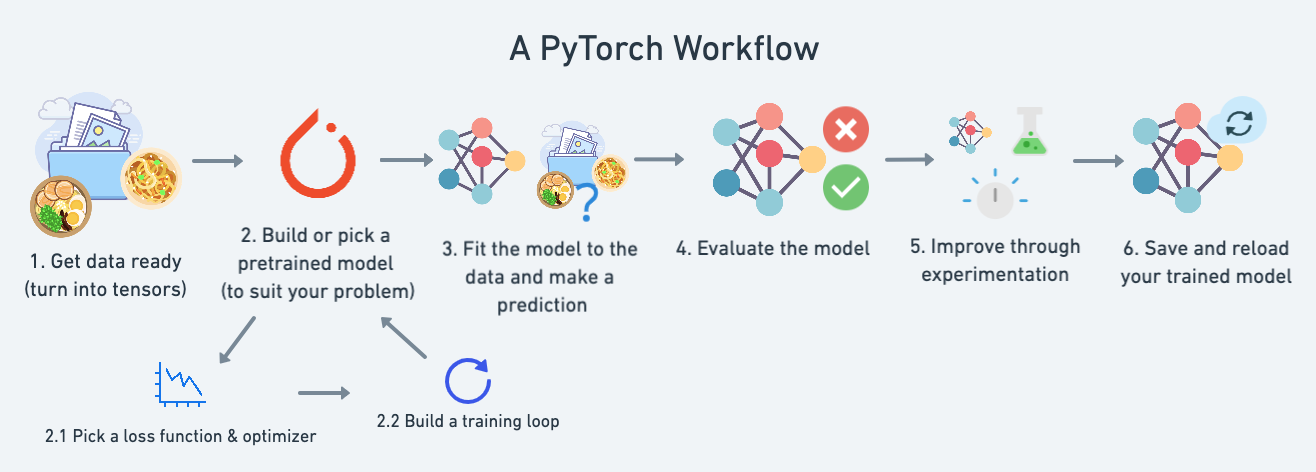

In [1]:
#Import all the required libraries

import torch
import numpy as np
from matplotlib import pyplot as plt
from torch import nn


#### ***Simple Linear Regression :***

> Y = m * X + b , Where m = slope & b = y-intercept.



In machine learning , 'X' is feature and 'Y' is target which can't be modified so the only option left is to modify the slope and bias which are called parameters in ML language.

In [2]:
# Let's create *Known* parameters

weight = 0.7
bias = 0.3

x = torch.arange(start =0 , end =1, step =0.02)
print(f"Dimension of tensor :{x.ndim}")
print(f"Shape of tensor :{x.shape}")
print(f"Feature Tensor :\n{x}")

#Using unsqueeze in-order to add extra dimension (vector -> matrix conversion).
X = x.unsqueeze(dim=1)

print(f"Feature Tensor post unsqueeze:{x[:10]}")

y  = weight * X + bias

print(f"Target value:\n{y[:10]}")


Dimension of tensor :1
Shape of tensor :torch.Size([50])
Feature Tensor :
tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])
Feature Tensor post unsqueeze:tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])
Target value:
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


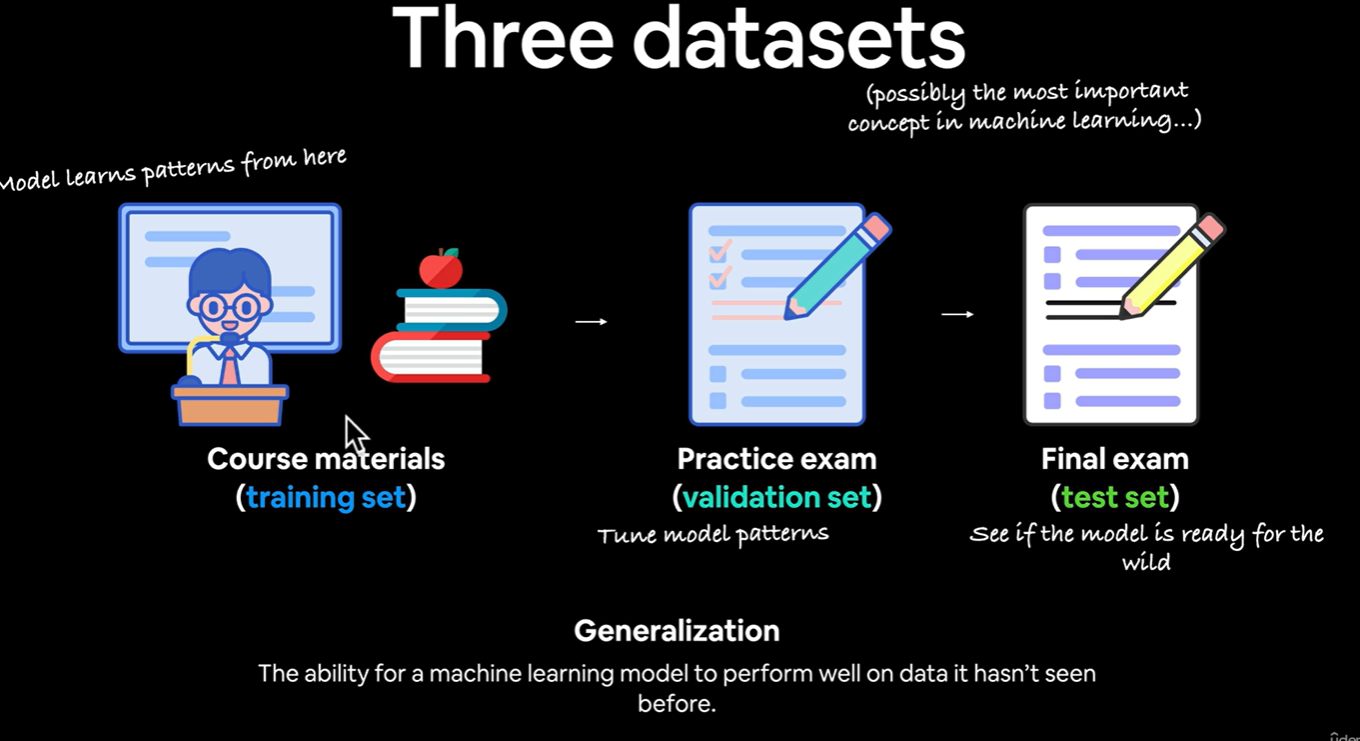

In [3]:
#Create train-test split
train_split = int(0.8 * len(X)) # Can also be written as train_split = int( 0.8 * X.shape[0])

X_train , y_train = X[:train_split] , y[:train_split] # Can also be written as X[ :train_split, :]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

### ***Visualization***

In [4]:
def prediction_plot( train_feature = X_train,
                     train_target = y_train,
                     test_feature = X_test,
                     test_target = y_test,
                     prediction=None):
  """
    Plotting training data , test data and compares prediction
  """

  plt.figure(figsize=(5,3))

  #Plotting training data - x_train and y_train
  plt.scatter(x = train_feature , y= train_target, c="g" ,s=4, label= "Training Data")

  #Plotting test data - x_test and y_test
  plt.scatter (x = test_feature , y=test_target, c="b" , s=4, label= "Test Data")

  #Plotting test data and prediction data
  if prediction is not None:
      plt.scatter(x = test_target , y = prediction , c= 'r', s= 4 , label="Predicted Data")

  #Show the legend
  plt.legend(prop={"size":10})  #Can also be written as plt.legend(fontsize=14)


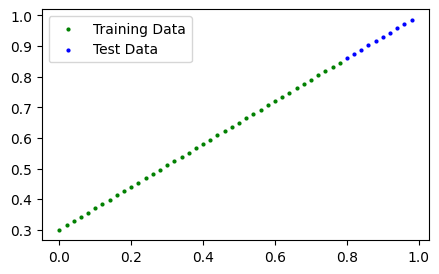

In [5]:
prediction_plot(X_train, y_train , X_test , y_test)

In [ ]:
torch.randn(size=(1))

TypeError: ignored

In [ ]:
torch.randn(size=1)

TypeError: ignored

In [ ]:
#If you want single random tensor then just specifiy the number without using size variable as shown below.

torch.randn(1)

tensor([2.2082])

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1 , # Start with the random weight and try to adjust it to the ideal weight
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True ,
                                         dtype=torch.float))

  # forward method is a callable function.
  def forward(self , x : torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias



#### ***Model building essentials***


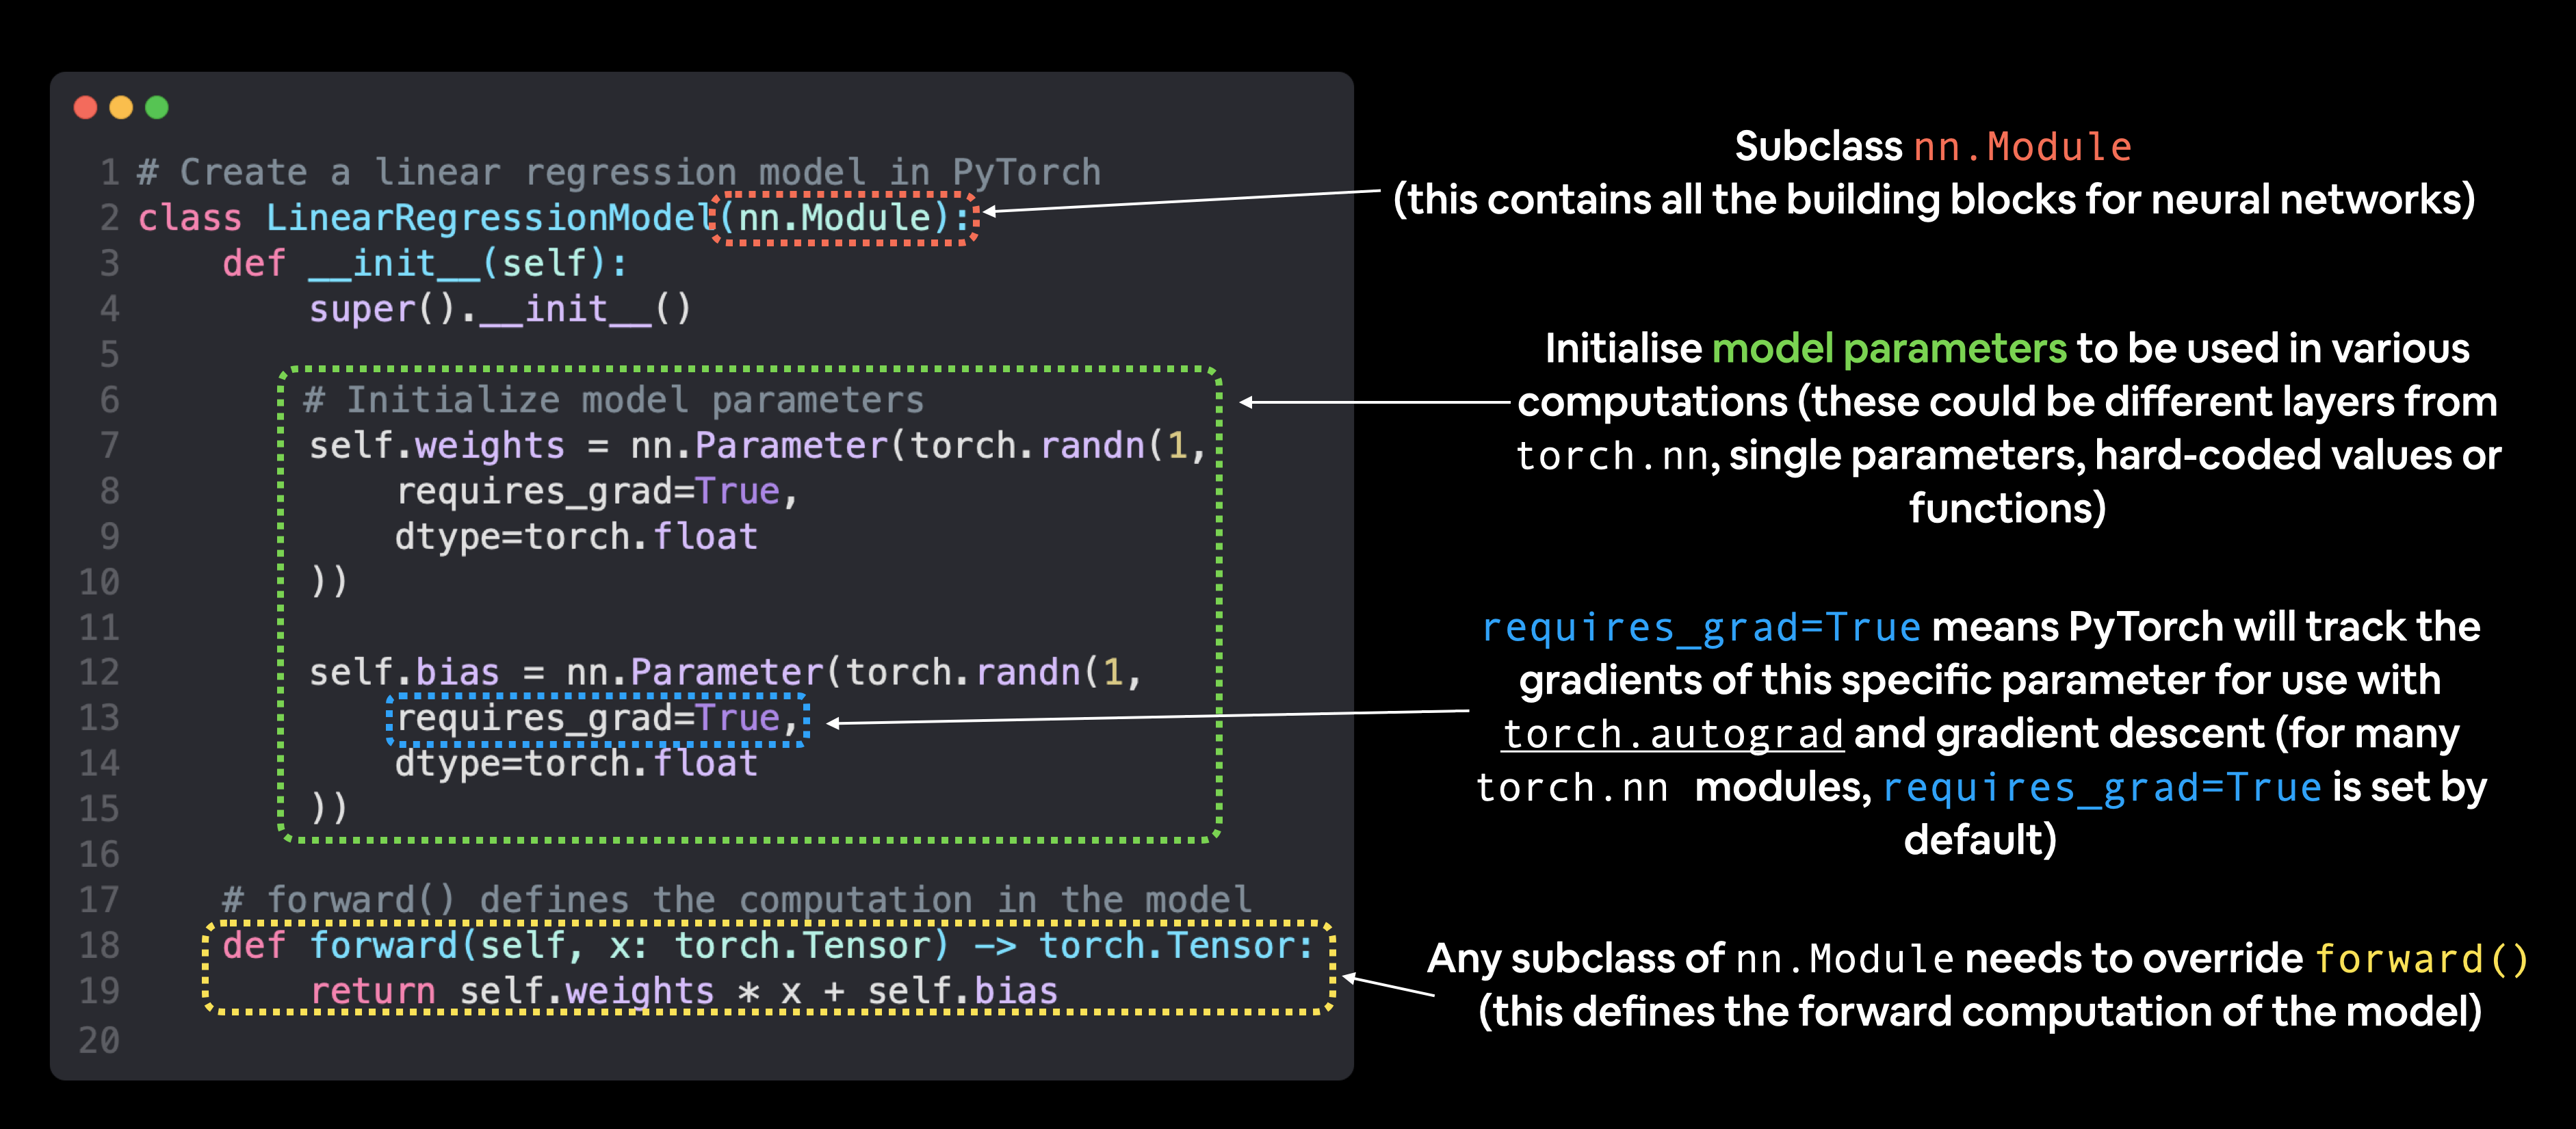

> #### ***Pytorch Cheat Sheet***
 https://pytorch.org/tutorials/beginner/ptcheat.html


 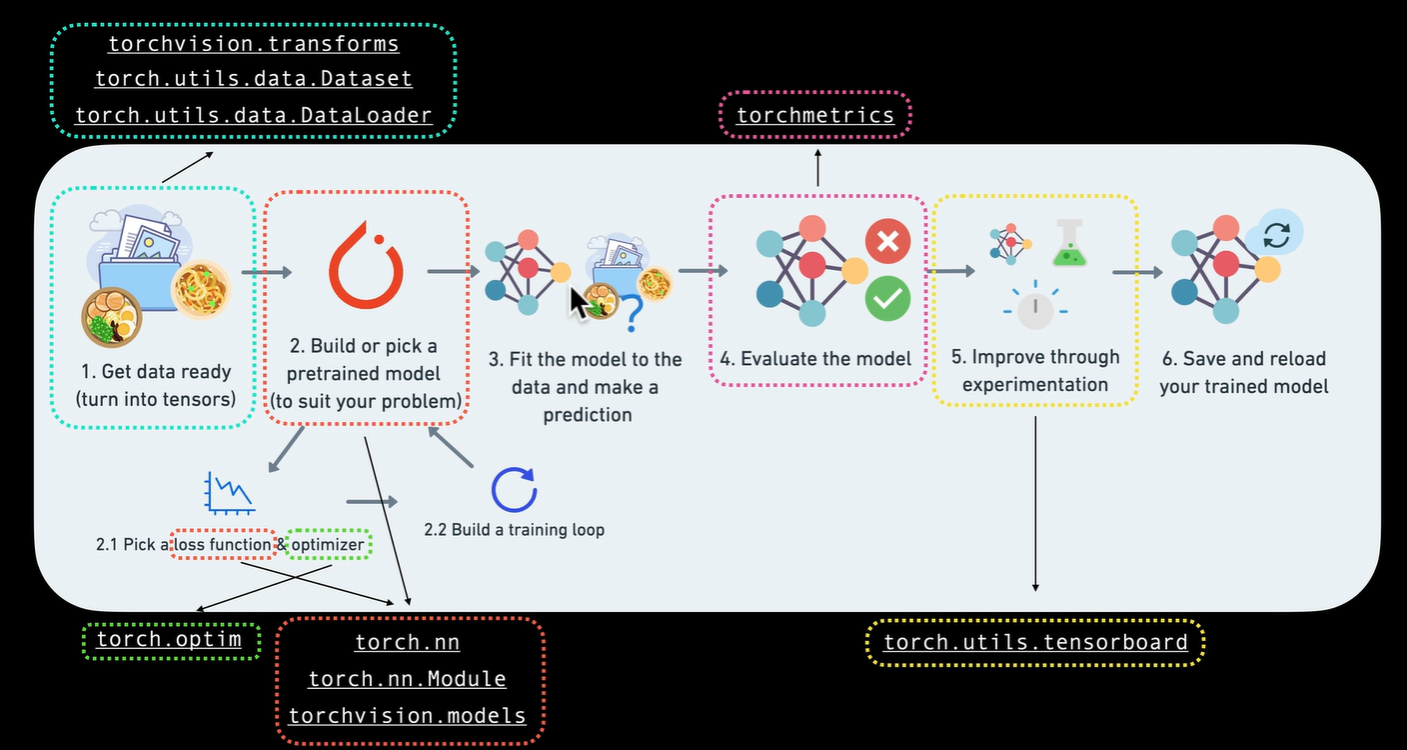

In [7]:
# Create a random seed.

torch.manual_seed(42)

model = LinearRegressionModel()

# model.parameters() returns an iterator over the parameters , the list() function is then used to convert this iterator to a list
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### ***Making prediction using `torch.inference_mode()`***




You probably noticed we used torch.inference_mode() as a context manager (that's what the with torch.inference_mode(): is) to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (**like gradient tracking, which is necessary for training but not for inference**) to make forward-passes (data going through the forward() method) faster.



> Note: In older PyTorch ,  torch.no_grad() is being used for inference. While torch.inference_mode() and torch.no_grad() do similar things, torch.inference_mode() is newer, potentially faster and preferred.

In [8]:
#Without setting to zero grad.
y_pred = model(X_test)
print(y_pred)


#With the existing random parameters we will try to predict the data. Making prediction - context manager

with torch.inference_mode():  # with torch.no_grad()
  y_pred = model(X_test)

#Can also be written as shown below
#with torch.no_grad():
#    y_pre = model(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

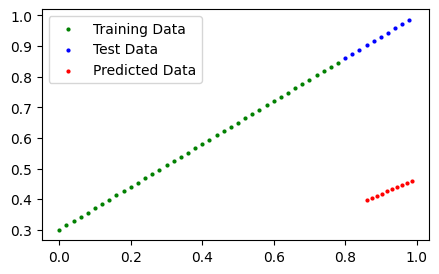

In [9]:
prediction_plot(prediction=y_pred)

#### ***Train model***

The whole idea of training a model is to move from some unknown parameters (these may be random) to some known parameters.

* Note : Loss function may also be called cost function or criterion in different areas.

Things we need during  training the model:

> * **Loss function** Function to measure how wrong our model's prediction are to the actual output , lower is better.

> * **Optimizer** Responsible for adjusting the parameters (weights and biases) of a model during the training process to minimize the loss function.

              params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before). For example parms = model.parameters()

              lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time

In [10]:
#Setup a loss function

loss_fn = nn.L1Loss()

#Setup an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

> #### ***Training a model***

  > 1. Do the forward pass.
  > 2. Calculate the loss.
  > 3. Optimizer zero grad
  > 4. loss backwards.
  > 5. Step optimizer.

> #### ***Testing a model***

  > 1. With torch no grad
  > 2. Do the forward pass.
  > 3. Calculate the loss.
  > 4. Watch for loss going down.

> Why we want to set optimizer to zero grad before calculating the loss.backward()?

> Ans : In PyTorch, calling optimizer.zero_grad() before loss.backward() is an essential step during the training loop, and it serves the purpose of preventing gradient accumulation. Here's why this step is necessary:

> 1. **Gradient Accumulation:** When you perform a backward pass (loss.backward()), PyTorch accumulates the gradients in the .grad attribute of each parameter. If you do not zero the gradients before the next backward pass, the new gradients will be added to the existing ones. This is useful in certain scenarios, such as when you want to accumulate gradients across multiple batches before performing a parameter update.

> 2. **Preventing Gradient Accumulation:** However, in most cases, you want to update the model parameters based on the gradients computed from the current batch of data. If you do not zero the gradients before the backward pass, the gradients from the previous iteration will influence the current iteration's parameter update, leading to incorrect and undesired results.

In [11]:
torch.manual_seed(42)
#An epoch is one loop through the entier dataset . This is an hyperparameter.
epochs = 300

#Set the model to the training mode. This mode enable operations like dropout or batch normalization.
#model.train()

#Tracking experiment -
epoch_count = []
train_loss_values = []
test_loss_values = []

#Loop through the data
for epoch in range (epochs):
  model.train()
  # Do the forward pass
  y_pred = model(X_train)

  #Calculate the loss
  loss = loss_fn(y_pred , y_train)

  #Optimizer zero grad.
  optimizer.zero_grad()

  #Perform backpropogation on the loss with respect to the model's parameters
  loss.backward()

  #Step optimizer (Perform the gradient descent)
  optimizer.step()

  #Testing
  model.eval() # turns of different setting (dropout  / batch normalization) in the model not needed for evaluation /testing
  with torch.inference_mode(): # turns of gradient tracking.
    test_pred = model(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch :{epoch}  | Loss : {loss} | Test Loss :{test_loss}")
    #print(model.state_dict())



Epoch :0  | Loss : 0.31288138031959534 | Test Loss :0.48106518387794495
Epoch :10  | Loss : 0.1976713240146637 | Test Loss :0.3463551998138428
Epoch :20  | Loss : 0.08908725529909134 | Test Loss :0.21729660034179688
Epoch :30  | Loss : 0.053148526698350906 | Test Loss :0.14464017748832703
Epoch :40  | Loss : 0.04543796554207802 | Test Loss :0.11360953003168106
Epoch :50  | Loss : 0.04167863354086876 | Test Loss :0.09919948130846024
Epoch :60  | Loss : 0.03818932920694351 | Test Loss :0.08886633068323135
Epoch :70  | Loss : 0.03476089984178543 | Test Loss :0.0805937647819519
Epoch :80  | Loss : 0.03132382780313492 | Test Loss :0.07232122868299484
Epoch :90  | Loss : 0.02788739837706089 | Test Loss :0.06473556160926819
Epoch :100  | Loss : 0.024458957836031914 | Test Loss :0.05646304413676262
Epoch :110  | Loss : 0.021020207554101944 | Test Loss :0.04819049686193466
Epoch :120  | Loss : 0.01758546568453312 | Test Loss :0.04060482233762741
Epoch :130  | Loss : 0.014155393466353416 | Test 

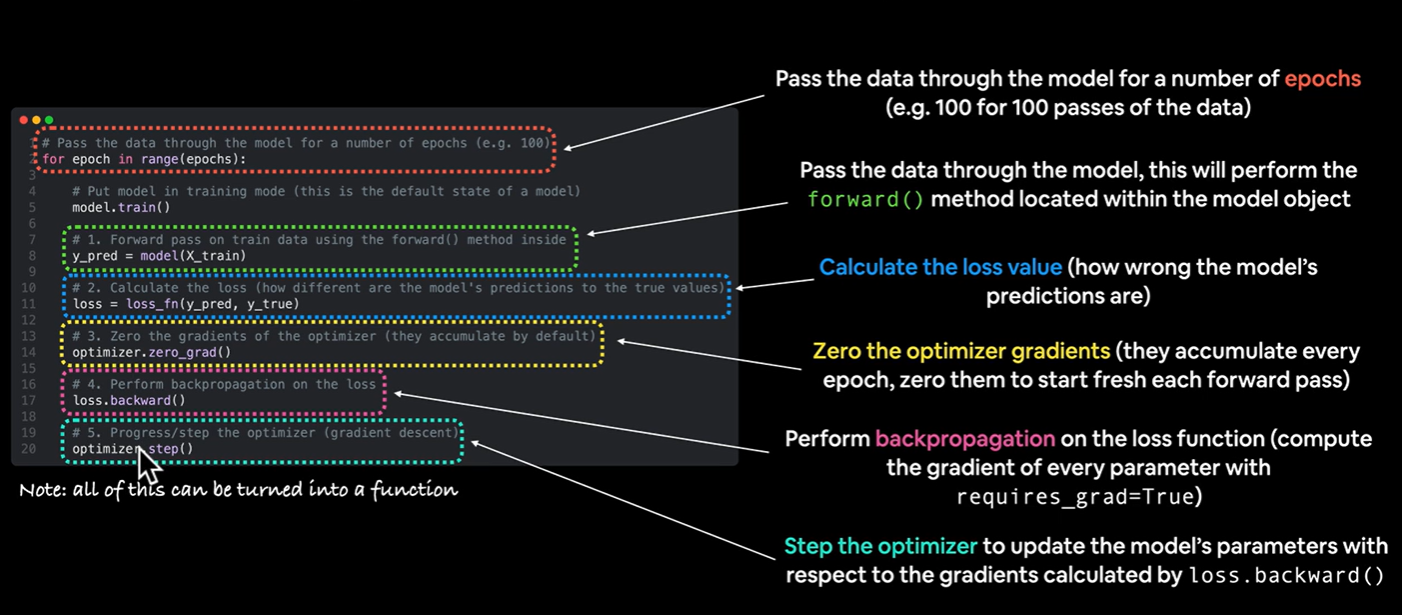

In [12]:
with torch.inference_mode():
  y_pred_new = model(X_test)

y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

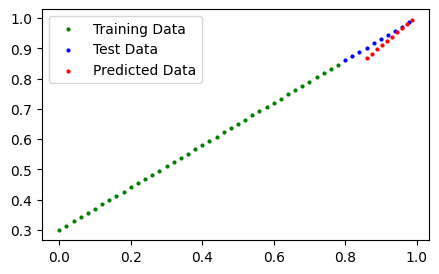

In [13]:
prediction_plot(prediction=y_pred_new)

In [14]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

#### **Plot the loss curves.**

RuntimeError: ignored

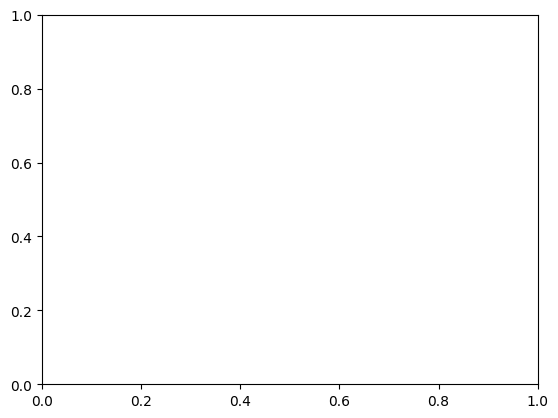

In [15]:
#plot the loss curves.
plt.plot(epoch_count,train_loss_values , label = "Train Loss")
plt.plot(epoch_count,test_loss_values , label = "Test Loss")


In [ ]:
#Checking whether the given variable is a tensor or not.
torch.is_tensor(train_loss_values)

False

In [ ]:
train_loss_values


[tensor(0.3129, grad_fn=<MeanBackward0>),
 tensor(0.0245, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>)]

In [16]:
#Code to remove the grad_fn attribute from the tensor.
torch.tensor(train_loss_values).numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

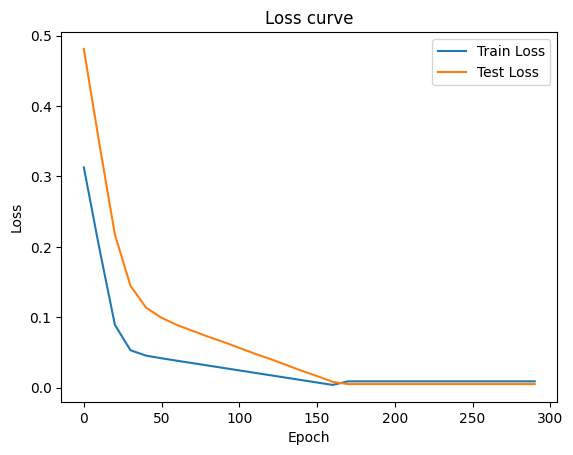

In [17]:
#plot the loss curves.
plt.plot(epoch_count, torch.tensor(train_loss_values).numpy() , label = "Train Loss")
plt.plot(epoch_count,test_loss_values , label = "Test Loss")
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

In [18]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [19]:
optimizer.param_groups[0]

{'params': [Parameter containing:
  tensor([0.6990], requires_grad=True),
  Parameter containing:
  tensor([0.3093], requires_grad=True)],
 'lr': 0.01,
 'momentum': 0,
 'dampening': 0,
 'weight_decay': 0,
 'nesterov': False,
 'maximize': False,
 'foreach': None,
 'differentiable': False}

In [20]:
optimizer.param_groups[0]['lr']

0.01

In [30]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
model.state_dict()['weights']

tensor([0.6990])

In [21]:
loss.item()

0.0025885067880153656

#### ***Saving a model***

> Below methods used for saving and loading a model in pytorch.

> 1. `torch.save()` - save an object in the python pickle's format.
> 2. `torch.load()` - load the saved object.
> 3. `torch.nn.Module.load_state_dict()` - load a model's saved state dictionary.

In [44]:
from pathlib import Path

# Creating a directory to save the model.
MODEL_FOLDER = Path("models")
MODEL_FOLDER.mkdir(parents=True , exist_ok=True)

# File name to save the model
MODEL_NAME = "pytorch_linear_model.pth"

# Join paths
MODEL_SAVE_PATH = MODEL_FOLDER / MODEL_NAME

#Save the model
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save( obj = model.state_dict(), f = MODEL_SAVE_PATH )

"""
# Save additional information in a dictionary
info_to_save = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss.item(),
    'learning_rate': optimizer.param_groups[0]['lr']
}

# Save the dictionary to a file
torch.save(info_to_save, 'model_info.pth')
"""

Saving model to models/pytorch_linear_model.pth


#### ***Loading a saved model***

In [46]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1574 Dec 19 22:27 pytorch_linear_model.pth


#### Since we haven't saved the entire model but the model `state_dict`. We need to create a new model instance and load the `state_dict` in to it.

In [51]:
# Create a new model instance to load the saved model.

loaded_model = LinearRegressionModel()

loaded_model.state_dict()

OrderedDict([('weights', tensor([0.4617])), ('bias', tensor([0.2674]))])

In [53]:
loaded_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<All keys matched successfully>

In [55]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
n

In [64]:
#Making predicition with the loaded model

loaded_model.eval()
with torch.inference_mode():
    loaded_model_pred = loaded_model(X_test)

In [68]:
#Making prediction with the original model.

model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

In [62]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

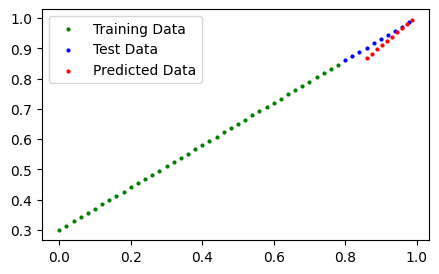

In [65]:
prediction_plot (prediction=loaded_model_pred)

In [70]:
#Comparing the original model prediction with the saved & loaded model prediction.
y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])